## Data and setting
<br>
<br>

There are many options to collect and build the Wikipedia's underlying network, we rely on the dataset provided [here](https://snap.stanford.edu/data/wiki-topcats.html). For the purpose of our exploration, we do not consider the entire dataset. Instead, we focus on the articles belonging to a subset of categories.
<br>

1. Download the reduced version of the graph [Wikicat hyperlink graph](https://drive.google.com/file/d/1QVt0aMOFvLjOEm5eKeCxBQUwIU30_NIh/view?usp=sharing). Every row indicates an edge. In particular, the two elements are the source and the target, respectively.


2. From [this page](https://snap.stanford.edu/data/wiki-topcats.html) download:

    * `wiki-topcats-categories.txt.gz`: list of pages per category
    * `wiki-topcats-page-names.txt.gz`: page names
    


Note that in the reduced version of the network we removed the categories whose number of articles in less than 5000 and more than 30000.


## General notes
<br>
<br>


1. You will notice that one article might belong to a single category or multiple ones. In the case of multiple appearance, you break the ties uniformly at random. Please, do it before solving any task in the homework.
2. We assume that all edges in the graphs we will consider have weight equal to 1.
3. All the algorithms, unless specified, must be implement from scratch.
4. The algorithms should handle exceptions, e.g. what if there is no path between two nodes?
5. Differently from other homeworks, we will execute your functions.


--------------

**Comments:**

First, we load all the libraries that we'll need

In [1]:
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt 
from collections import defaultdict
import numpy as np
import pickle 

import functions

**Comments:**

Loading the data that we have downloaded

In [2]:
wikigraph_reduced = pd.read_csv('wikigraph_reduced.csv', sep='\t', index_col=0)

In [3]:
wikigraph_reduced = wikigraph_reduced.rename(columns={'0': 'Source', '1': 'Target'})
wikigraph_reduced

,Source,Target
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222
...,...,...
28511768,1791481,1060990
28511769,1791481,1061382
28511771,1791481,1110380
28511772,1791482,80740


**Comments:**

Creating dictionary of the pages and their links using `wiki-topcats-categories.txt` file.

In [4]:
pages_dict = defaultdict(list)


with open('wiki-topcats-categories.txt') as f:
    
    for row in f.readlines():
        
        split = row.split()
        first_el = split[0]
        category = first_el[9:-1]
        pages = split[1:]

        for j in pages:
            
            pages_dict[category].append(j)
    

**Comments:**

Creating dictionary of the pages and their names using `wiki-topcats-page-names.txt` file.

In [5]:
pages_name_dict = {}


with open('wiki-topcats-page-names.txt') as f:
    
    for row in f.readlines():
        
        split = row.split()
        page_number = int(split[0])
        page_name = ' '.join(split[1:])
        pages_name_dict[page_number] = page_name


**Comments:**

We have saved the categories with their corresponding page numbers, therefore, we are able to load them faster.

In [6]:
with open('chosen_categories.pkl', 'rb') as f:
    chosen_categories = pickle.load(f)
    
f.close()

In [7]:
chosen_categories

,category,pages
219,Military_units_and_formations_of_the_United_St...,"[16421, 16422, 16423, 16424, 16426, 16428, 164..."
232,American_military_personnel_of_the_Vietnam_War,"[16540, 17315, 17344, 17368, 17438, 17850, 178..."
233,Recipients_of_the_Distinguished_Service_Medal_...,"[19031, 19101, 19140, 19373, 19513, 119764, 12..."
234,Recipients_of_the_Legion_of_Merit,"[15913, 16420, 16482, 16486, 16593, 16679, 167..."
305,Liga_I_players,"[26871, 26876, 26877, 26878, 26892, 26899, 269..."
...,...,...
17071,Pterophoridae,"[165144, 485707, 622626, 649984, 652398, 68728..."
17079,Nepticulidae,"[859056, 859060, 859071, 859072, 859074, 85907..."
17137,American_television_films,"[981, 14258, 15894, 22281, 23497, 23498, 55089..."
17232,Alumni_of_King's_College_London,"[1046, 1062, 1067, 2621, 6618, 12447, 15247, 1..."


------------

## RQ1
<br>
<br>

Build the graph G=(V, E), where V is the set of articles and E the hyperlinks among them.

**Comments:**

We import our custom function `create_graph_dict` to create a default dictionary graph using `wikigraph_reduced.csv` file.

In [8]:
from functions import create_graph_dict


graph_dict = create_graph_dict('wikigraph_reduced.csv')

Creating the same graph using `networkx`.

In [9]:
wiki_reduced = nx.from_pandas_edgelist(wikigraph_reduced, 'Source', 'Target', create_using = nx.DiGraph )

In [10]:
wiki_reduced

**Question:**

Then, provide its basic information:

* Is the graph directed?

**Comments:**



"*a directed graph (or digraph) is a graph that is made up of a set of vertices connected by edges, where the edges have a direction associated with them.*"

We check if a link exists in both the direction from the node to the source, if it's true the graph in **undirected**, otherwise is **directed**.

Using our custom function `check_directed` to check whether the default dictionary graph is directed or not.

In [11]:
from functions import check_directed

print('Is the graph directed?', check_directed(graph_dict))

Is the graph directed? True


We also check the `networkx` graph.

In [12]:
print('Is the graph directed?', nx.is_directed(wiki_reduced))

Is the graph directed? True


**Question:**

* How many articles are we considering?

**Comments:**

Recall: "graph G=(V, E), where V is the set of articles and E the hyperlinks among them"

So, V is the set of vertices and E is the set of edges

In [13]:
#From column to list of source nodes
source_list = wikigraph_reduced['Source'].tolist()

#From column to list of target nodes
target_list = wikigraph_reduced['Target'].tolist()

#the sum of all the source and target nodes is the total amount of the vertices 
all_vertices = source_list + target_list

#delete repetition 
all_vertices = len(set(all_vertices))

print('Number of articles: ', all_vertices)

Number of articles:  98343


We also check the number of nodes for `networkx` using `number_of_nodes` method

In [14]:
wiki_reduced.number_of_nodes()

98343

**Question:**

* How many hyperlinks between pages exist?


In [15]:
#as specified, each row of the file "wikigraph_reduced.csv" is an edge
hyperlinks = len(wikigraph_reduced)

print('Number of hyperlinks: ',hyperlinks)

Number of hyperlinks:  483094


We obtain the same result using `number_of_edges` method

In [16]:
wiki_reduced.number_of_edges()

483094

**Question:**


* Compute the average number of links in an arbitrary page. What is the graph [density](https://en.wikipedia.org/wiki/Dense_graph)? Do you believe that the graph is dense or sparse? Is the graph dense?

**Comments:**

Graph density for directed graph formula:  ${\displaystyle D={\frac {|E|}{|V|(|V|-1)}}}$

In [17]:
density =  hyperlinks / (all_vertices * (all_vertices - 1))
print('The graph density is: ',density)

The graph density is:  4.9951571365597335e-05


The same outcome with `networkx` function

In [18]:
nx.density(wiki_reduced)

4.9951571365597335e-05

**Question:**

* Visualize the nodes' degree distribution


**Comment:**

Some info about our graph

In [19]:
print(nx.info(wiki_reduced))

Name: 
Type: DiGraph
Number of nodes: 98343
Number of edges: 483094
Average in degree:   4.9123
Average out degree:   4.9123


We decided to plot three different degree distributions: 

1. Total
2. Out degree
3. In degree

We use also networkx library to check if our dictionary with in,out and total degree are the same of the nx ones.

* Degree out

In [20]:
node_degree_out = wiki_reduced.out_degree()

In [21]:
degree_out = defaultdict(int)

for i in graph_dict.keys():
    degree_out[i] = len(graph_dict[i])


In [22]:
with open('degree_out.pkl', 'wb') as f:
    pickle.dump(degree_out, f)

In [23]:
with open('degree_out.pkl', 'rb') as f:
    degree_out = pickle.load(f)

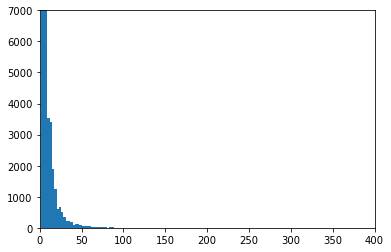

In [24]:
x = list(degree_out.keys())
y = list(degree_out.values())

plt.hist(y, bins = 500)
plt.ylim(0, 7000)
plt.xlim(0, 400)
plt.show()

* Degree in

In [25]:
node_degree_in = wiki_reduced.in_degree()

In [44]:
degree_in = defaultdict(int)

for i in wiki_reduced.nodes:
    degree_in[i] = sum([1  for elem in graph_dict.values() if i in elem])
    

In [ ]:
with open('degree_in.pkl', 'wb') as f:
    pickle.dump(degree_in, f)

In [ ]:
with open('degree_in.pkl', 'rb') as f:
    degree_in = pickle.load(f)
f.close()

In [ ]:
#degree_in

In [ ]:
x = list(degree_in.keys())
y = list(degree_in.values())

plt.hist(y, bins = 500)
plt.ylim(0, 7000)
plt.xlim(0, 400)
plt.show()

* Total Degree

In [ ]:
node_degree_tot = nx.degree(wiki_reduced)
#node_degree_tot = (dict(node_degree_tot))

In [ ]:
type(wiki_reduced.nodes)

In [ ]:
degree_tot = defaultdict(int)

for i in wiki_reduced.nodes:
    try:
        degree_tot[i] = degree_out[i] + degree_in[i] 
    except:
        try:
            degree_tot[i] = degree_out[i]
        except:
            try:
                degree_tot[i] = degree_in[i]
            except:
                degree_tot[i] = 0

In [50]:
with open('degree_tot.pkl', 'wb') as f:
    pickle.dump(degree_tot, f)

In [33]:
with open('degree_tot.pkl', 'rb') as f:
    degree_tot = pickle.load(f)
f.close()

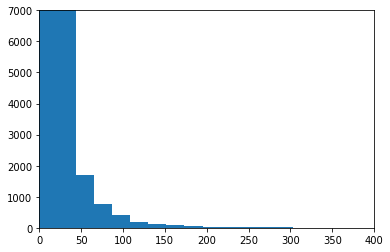

In [90]:
x = list(degree_tot.keys())
y = list(degree_tot.values())


plt.hist(y, bins = 500)
plt.ylim(0, 7000)
plt.xlim(0, 400)
plt.show()

Here we check, randomly, if specified node has the same in/out/tot degree of the one computed with networkx

In [114]:
rand_choice = np.random.choice(wiki_reduced.nodes, 3)

for i in rand_choice:
    print('\nRandom node chosen:', i)
    print('Total degree as computed by us and by networkx, respectively:', degree_tot[i], node_degree_tot[i])
    print('Out degree as computed by us and by networkx, respectively:', degree_out[i], node_degree_out[i])
    print('In degree as computed by us and by networkx, respectively:', degree_in[i], node_degree_in[i])


Random node chosen: 382198
Total degree as computed by us and by networkx, respectively: 2 2
Out degree as computed by us and by networkx, respectively: 2 2
In degree as computed by us and by networkx, respectively: 0 0

Random node chosen: 88881
Total degree as computed by us and by networkx, respectively: 8 8
Out degree as computed by us and by networkx, respectively: 7 7
In degree as computed by us and by networkx, respectively: 1 1

Random node chosen: 80774
Total degree as computed by us and by networkx, respectively: 3 3
Out degree as computed by us and by networkx, respectively: 3 3
In degree as computed by us and by networkx, respectively: 0 0


--------------------

## RQ2
<br>
<br>


Define a function that takes in input:

* A page v
* A number of clicks d

and returns the set of all pages that a user can reach within d clicks.

**Comments:**

We have created two custom fucntions `BFS_click` and `find_set_of_pages` to solve this question


`BFS_click` is a recursive function  used to find the pages reachable in a given number of clicks

`find_set_of_pages` is a function that use `BFS_click` function and asks the user:
    
   >1. To enter a page number
   >2. To enter a number of click
    
To find the set of the reachable pages

In [12]:
from functions import BFS_click
from functions import find_set_of_pages

set_pages = find_set_of_pages(graph_dict)

Choose a page number:
95
Choose a number of clicks
3


We'll check the first 5 

In [14]:
set_pages_names = []

for p in set_pages:
    name = pages_name_dict[p]
    set_pages_names.append(name)

print(len(set_pages_names))

131


In [15]:
set_pages_names[:5]

['Tina Fey',
 'Savion Glover',
 '22nd Century Lifestyle',
 'Jennifer Syme',
 'Issues 101']

We also check to see if we obtain the same result using `networkx`

In [16]:
elements = list(nx.bfs_edges(wiki_reduced, source=95, depth_limit=3))
nx_bfs = list(list(zip(*elements))[1])
nx_bfs.sort()

In [17]:
print(set_pages == nx_bfs)

True


-------------------

## RQ3
<br>
<br>


Define a function that takes in input:

* A category $C$
* A set of pages in $C$, $p = {p1, ..., pn}$

and returns the minimum number of clicks required to reach all pages in $p$, starting from the page $v$, corresponding to the most central article, according to the in-degree centrality, in $C$.

Consider that:

* The algorithm needs to handle the case that the graph is not connected, thus not all the pages in $p$ are reachable from $v$. In such scenario, it is enough to let the program give in output the string "Not possible".
* Since we are dealing with graph exploration, you can pass more than once on the same page $p_i$.
* Since the problem’s complexity is high, consider to provide just an approximation/heuristic solution for the problem.
* You can use whatever metrics of centrality.

--------

## RQ4
<br>
<br>


Given in input two categories: $C_1$ and $C_2$, we get the subgraph induced by all the articles in the two categories.

**Comments:**

To create the subgraph we use the custom function `create_subgraph` (or `create_subgraph2`) to create the subgraph using two categories as input.

In [11]:
from functions import create_subgraph
from functions import create_subgraph2

sub_G = create_subgraph(wiki_reduced, chosen_categories, c1 = 34, c2 = 646, random_pick=False)

The first category is 'Italian_footballers' Index: 34 
The second one is 'Companions_of_the_Order_of_St_Michael_and_St_George' Index: 646


**Question:**

* Let $v$ and $u$ two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect $u$ and $v$ ?


**Comments:**

To find the minimum set of hyperlinks to disconnect $u$ and $v$, we have created a custom function `min_remove_hyperlinks` that receives `source_node` and `target_node` from the user. 

The function handles the exceptions and return the list of edges to be cut and the number of minimum cuts to disconnect $u$ and $v$.

For more info check the docstrings in `functions.py` file.

In [12]:
from functions import min_remove_hyperlinks

print(min_remove_hyperlinks(sub_G, source_node= 436236 , target_node = 436233))

You need 3 cuts to disconnect them!

The List of hyperlinks to cut:
[(436236, 436233), (436236, 436235), (436236, 436237)]


-----------

## RQ5
<br>
<br>


Write a function that, given an arbitrary category $C_0$ as input, returns the list of remaning categories sorted by their distance from $C_0$. In particular, the distance between two categories is defined as

distance($C_0$, $C_i$) = median(ShortestPath($C_0$, $C_i$))

where ShortestPath($C_0$, $C_i$) is the set of shortest paths from each pair of nodes in the two categories.

## RQ6
<br>
<br>



Write a function that sorts the categories in the graph according to their PageRank (PR). For this task you need to model the network of categories such that you can apply the PR algorithm.

**Comments:**

First, let's take a look at dataframe of the categories chosen according to the "General Notes" section.

In [4]:
chosen_categories

,category,pages
0,Buprestoidea,"[301, 302, 303, 304, 305, 306, 307, 308, 309, ..."
1,People_from_Worcester,"[1057, 1058, 1059, 60971, 76515, 76871, 78094,..."
2,Skin_conditions_resulting_from_physical_factors,"[971, 973, 1166, 1167, 1168, 1169, 1170, 1171,..."
3,Visual_kei_bands,"[1297, 1300, 1313, 1314, 1315, 1316, 1319, 132..."
4,Japanese_rock_music_groups,"[1389, 1397, 1399, 1400, 1402, 1408, 1409, 141..."
...,...,...
17359,British_science_fiction_novels,"[24545, 158425, 165104, 220710, 354005, 418467..."
17360,Television_soundtracks,"[1117, 110192, 110377, 110395, 137001, 140323,..."
17361,Diptera_of_North_America,"[280, 31110, 31139, 31143, 31146, 31163, 31179..."
17362,Diptera_of_Asia,"[279, 31129, 31133, 31134, 31135, 31136, 31137..."


In [5]:
#dictionary created from the dataframe with category as key and the list of all the related pages as values
categories_dict = dict(chosen_categories.values.tolist())

In [6]:
#categories_dict

In [7]:
with open('opposite_dict.pkl', 'rb') as f:
    opposite_dict = pickle.load(f)

In [2]:
#opposite_dict

In [9]:
with open('category_related_nodes.pkl', 'rb') as f:
    category_related_nodes = pickle.load(f)

In [3]:
#category_related_nodes

In [11]:
with open('category_counter.pkl', 'rb') as f:
    category_counter = pickle.load(f)

In [45]:
#category_counter